In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helper as hp
import statsmodels.api as sm

current_path = os.getcwd()

STOCKS = ["TSLA"]
START_DATE = hp.START_DATE
END_DATE = hp.END_DATE

In [4]:
# data fetching 
lag = 5
stock_data = {}
for stock in STOCKS:
    data_path = os.path.join(current_path, "data", f"{stock}_{START_DATE}_{END_DATE}.csv")
    data = pd.read_csv(data_path)
    stock_data[stock] = data
df_stock = stock_data['TSLA']
df_stock['Date'] = pd.to_datetime(df_stock['Date']).dt.date
df_stock[f'Return_{lag}_days_later'] = (df_stock['Close'].shift(-lag) - df_stock['Close'])/df_stock['Close'] * 100

In [5]:
df_0 = pd.read_csv('predicted_label_data\predictions_stock_tweets_filtered_TSLA.csv')
df_1 = pd.read_csv('predicted_label_data\predictions_Tweet_filtered_TSLA.csv')
df_2 = pd.read_csv('predicted_label_data\predictions_tweets_remaining_filtered_TSLA.csv')

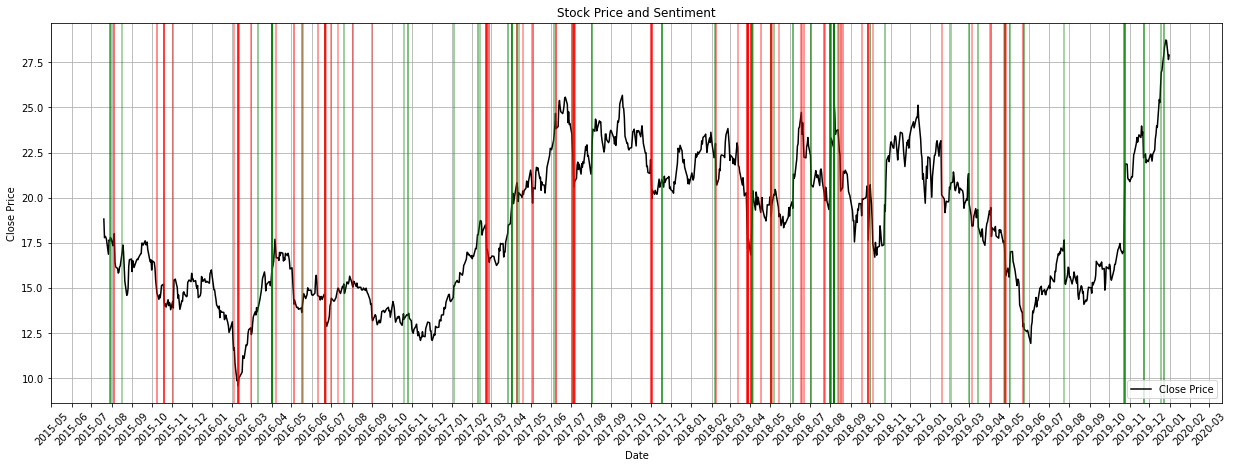

Optimization terminated successfully.
         Current function value: 0.688892
         Iterations 4
                            Logit Regression Results                           
Dep. Variable:     Return_5_days_later   No. Observations:                 1122
Model:                           Logit   Df Residuals:                     1116
Method:                            MLE   Df Model:                            5
Date:                 Thu, 30 Nov 2023   Pseudo R-squ.:               0.0008560
Time:                         00:29:57   Log-Likelihood:                -772.94
converged:                        True   LL-Null:                       -773.60
Covariance Type:             nonrobust   LLR p-value:                    0.9324
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0961      0.171      0.561      0.575    

In [108]:
df_0_summary = hp.calculate_sentiment_summary(df_0, window_size = 200, threshold=2, min_periods=10)
df_1_summary = hp.calculate_sentiment_summary(df_1, window_size = 200, threshold=2, min_periods=200)
df_2_summary = hp.calculate_sentiment_summary(df_2, window_size = 40, threshold=1.5, min_periods=5)

df_stock_sentiment = df_stock.merge(df_1_summary, left_on='Date', right_on='date', how='inner')
hp.plot_stock_sentiment(df_stock_sentiment)


predictor = ['daily_positive_sentiment', 'daily_negative_sentiment', 'dominant_sentiment', 'z_score_positive', 'z_score_negative']
X = df_stock_sentiment[predictor]
X = sm.add_constant(X)
Y = df_stock_sentiment[f'Return_{lag}_days_later'] > 0
model = sm.Logit(Y, X).fit()
print(model.summary())

In [33]:
df_stock_sentiment

,Date,Open,High,Low,Close,Adj Close,Volume,Return_5_days_later,date,daily_positive_sentiment,daily_negative_sentiment,z_score_positive,z_score_negative,unusual_positive_sentiment,unusual_negative_sentiment,relative_daily_positive_sentiment,relative_daily_negative_sentiment,net_sentiment,dominant_sentiment
0,2015-07-20,18.333332,19.110001,18.169333,18.817333,18.817333,74677500,-10.362790,2015-07-20,319.866348,104.133653,0.480001,0.190144,False,False,1.300640,1.161209,215.732696,0
1,2015-07-21,18.003332,18.233334,17.770000,17.784666,17.784666,91630500,-0.730962,2015-07-21,334.599759,233.400239,0.573759,1.869140,False,False,1.358125,2.582191,101.199520,0
2,2015-07-22,17.417999,17.962667,17.390667,17.858000,17.858000,46575000,-1.511930,2015-07-22,238.102337,88.897662,-0.053625,-0.019436,False,False,0.966606,0.983587,149.204675,0
3,2015-07-23,17.976667,17.993334,17.684668,17.813334,17.813334,33408000,-0.153448,2015-07-23,304.910508,32.089492,0.380831,-0.760796,False,False,1.236380,0.356173,272.821016,0
4,2015-07-24,17.825333,18.072666,17.594667,17.694000,17.694000,42547500,0.278815,2015-07-24,188.475844,53.524156,-0.378758,-0.478227,False,False,0.765130,0.595262,134.951687,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,2019-12-24,27.890667,28.364668,27.512667,28.350000,28.350000,120820500,1.178129,2019-12-24,826.614594,468.385406,0.416563,0.072165,False,False,1.238893,1.047154,358.229188,0
1118,2019-12-26,28.527332,28.898666,28.423332,28.729334,28.729334,159508500,2.800853,2019-12-26,825.663536,392.336461,0.422025,-0.182491,False,False,1.241639,0.880647,433.327075,0
1119,2019-12-27,29.000000,29.020666,28.407333,28.691999,28.691999,149185500,4.916588,2019-12-27,909.713893,414.286107,0.648686,-0.103298,False,False,1.370448,0.932534,495.427786,0
1120,2019-12-30,28.586000,28.600000,27.284000,27.646667,27.646667,188796000,13.108266,2019-12-30,897.839532,535.160468,0.639157,0.342302,False,False,1.363195,1.220197,362.679064,0
